<a href="https://colab.research.google.com/github/natewoods1221/Data-Science-1002/blob/main/NateWoods_of_06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [7]:
import pandas as pd

---

In [8]:
Nate_list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [9]:
series = pd.Series(Nate_list)
print(series)


0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [10]:
series.index = range(2, 2 + len(Nate_list) * 3, 3)
print(series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [11]:
Information = {
    'name' : ['Bryan', 'Joe', 'Tim', 'Matt'],
    'age' : [21, 42, 72, 16],
    'career' : ['plumber', 'judge', 'doctor', 'police']
}
df = pd.DataFrame(Information)
print(df)


    name  age   career
0  Bryan   21  plumber
1    Joe   42    judge
2    Tim   72   doctor
3   Matt   16   police


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [12]:
df = df.rename_axis('participant_id')
print(df)

                 name  age   career
participant_id                     
0               Bryan   21  plumber
1                 Joe   42    judge
2                 Tim   72   doctor
3                Matt   16   police


6. Use a pandas function to determine the data types of the columns of `df`.

In [13]:
print(df.dtypes)

name      object
age        int64
career    object
dtype: object


7. Using bracket notation, reference column `name`

In [14]:
df['name']

participant_id
0    Bryan
1      Joe
2      Tim
3     Matt
Name: name, dtype: object

8. Using dot notation, reference column `name`

In [15]:
df.name

participant_id
0    Bryan
1      Joe
2      Tim
3     Matt
Name: name, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [17]:
name_df = df[['name']]
print(name_df)

                 name
participant_id       
0               Bryan
1                 Joe
2                 Tim
3                Matt


9. Show the 3rd element in column `career`.

In [18]:
third_career = df['career'].iloc[2]
print(third_career)

doctor


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [19]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [26]:
correlation = iris['sepal_length'].corr(iris['sepal_width'])
print("Correlation between sepal_length and sepal_width:", correlation)

Correlation between sepal_length and sepal_width: -0.11756978413300208


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [21]:
correlation_species = iris.groupby('species')[['sepal_length', 'sepal_width']].corr().iloc[0::2, -1]
print("Correlation between sepal_length and sepal_width for each species:")
print(correlation_species)
#setosa has the highet correlation

Correlation between sepal_length and sepal_width for each species:
species                 
setosa      sepal_length    0.742547
versicolor  sepal_length    0.525911
virginica   sepal_length    0.457228
Name: sepal_width, dtype: float64


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative correlation?  Again, include calculations to support your answer.

In [28]:
grouped_species = iris.groupby('species')
for species, data in grouped_species:
    correlation_options = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
    min_correlation = correlation_options.min().min()
    variables_with_min_correlation = correlation_options.stack()[
        correlation_options.stack() == min_correlation].index.tolist()

    print(f"species '{species}':")
    print(f"The variables with the most negative correlation are: {variables_with_min_correlation}, Correlation: {min_correlation}\n")

species 'setosa':
The variables with the most negative correlation are: [('sepal_width', 'petal_length'), ('petal_length', 'sepal_width')], Correlation: 0.1776999667822706

species 'versicolor':
The variables with the most negative correlation are: [('sepal_length', 'sepal_width'), ('sepal_width', 'sepal_length')], Correlation: 0.5259107172828247

species 'virginica':
The variables with the most negative correlation are: [('sepal_length', 'petal_width'), ('petal_width', 'sepal_length')], Correlation: 0.2811077091573193



14.  Show a scatter plot of the data from your answer to problem 13.  That is, for whichever species and pair of variables you found to have the most negative correlation, make a scatter plot of those two variables for the given species.


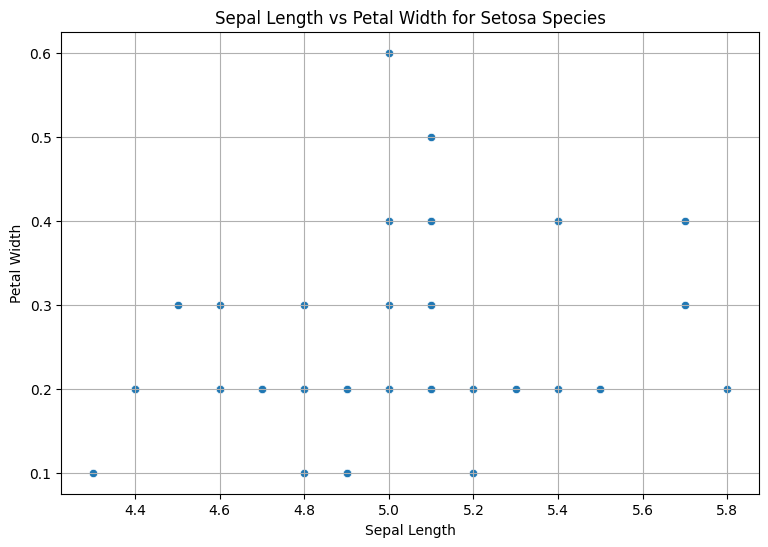

In [36]:
import matplotlib.pyplot as plt
species = 'setosa'
species_data = iris[iris['species'] == species]
plt.figure(figsize=(9, 6))
sns.scatterplot(data=species_data, x='sepal_length', y='petal_width')
plt.title(f"Sepal Length vs Petal Width for {species.capitalize()} Species")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()
